In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [3]:
%%R
remotes::install_github("satijalab/seurat", ref = "release/4.0.0")

R[write to console]: Skipping install of 'Seurat' from a github remote, the SHA1 (da578a42) has not changed since last install.
  Use `force = TRUE` to force installation



In [4]:
%%R
devtools::install_github('satijalab/seurat-data')

R[write to console]: Downloading GitHub repo satijalab/seurat-data@HEAD




✔  checking for file ‘/tmp/RtmpcrGxld/remotes393253b7f9/satijalab-seurat-data-c633765/DESCRIPTION’ (380ms)
─  preparing ‘SeuratData’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘SeuratData_0.2.1.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
%%R
library(Seurat)
library(SeuratData)
library(cowplot)
library(dplyr)
InstallData("bmcite")
bm <- LoadData(ds = "bmcite")
bm_pred <- LoadData(ds = "bmcite")

R[write to console]: Registered S3 method overwritten by 'spatstat':
  method     from
  print.boxx cli 

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'http://seurat.nygenome.org/src/contrib/bmcite.SeuratData_0.3.0.tar.gz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 104592412 bytes (99.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [6]:
%%R
DefaultAssay(bm) <- 'RNA'
bm <- NormalizeData(bm) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(reduction.name = 'rpca')
DefaultAssay(bm) <- 'ADT' 
VariableFeatures(bm) <- rownames(bm[["ADT"]])
bm <- NormalizeData(bm, normalization.method = 'CLR', margin = 2) %>% 
  ScaleData() %>% RunPCA(reduction.name = 'apca')


R[write to console]: Performing log-normalization

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to conso

In [7]:
%%R
DefaultAssay(bm_pred) <- 'RNA'
bm_pred <- NormalizeData(bm_pred) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(reduction.name = 'rpca')
DefaultAssay(bm_pred) <- 'ADT'
VariableFeatures(bm_pred) <- rownames(bm_pred[["ADT"]])

bm_pred <- NormalizeData(bm_pred, normalization.method = 'CLR', margin = 2) 
bm_p.pADT <- read.csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/ADT_XGBoost_prediction.csv", header = TRUE, row.names = 1)
colnames(bm_p.pADT) <- colnames(GetAssayData(bm_pred, slot = 'data'))
bm_p.pADT <- as.matrix(bm_p.pADT)
DefaultAssay(bm_pred) <- 'ADT'
bm_pred <- SetAssayData(bm_pred, slot = "data", new.data = bm_p.pADT)
bm_pred <- ScaleData(bm_pred) %>% RunPCA(reduction.name = 'papca')


R[write to console]: Performing log-normalization

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to conso

In [8]:
%%R
# Identify multimodal neighbors. These will be stored in the neighbors slot, 
# and can be accessed using bm[['weighted.nn']]
# The WNN graph can be accessed at bm[["wknn"]], 
# and the SNN graph used for clustering at bm[["wsnn"]]
# Cell-specific modality weights can be accessed at bm$RNA.weight
bm <- FindMultiModalNeighbors(
  bm, reduction.list = list("rpca", "apca"), 
  dims.list = list(1:30, 1:18), modality.weight.name = "RNA.weight"
)

write.csv(bm$celltype.l2, "/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/celltype_orig.csv")
write.csv(bm@neighbors$weighted.nn@nn.idx, "/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/nearest_neighbor_wnn_orig.csv")

bm_pred <- FindMultiModalNeighbors(
  bm_pred, reduction.list = list("rpca", "papca"), 
  dims.list = list(1:30, 1:18), modality.weight.name = "RNA.weight"
)

write.csv(bm_pred$celltype.l2, "/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/celltype_pred.csv")
write.csv(bm_pred@neighbors$weighted.nn@nn.idx, "/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/nearest_neighbor_wnn_pred.csv")

R[write to console]: Calculating cell-specific modality weights

R[write to console]: Finding 20 nearest neighbors for each modality.

R[write to console]: Calculating kernel bandwidths

R[write to console]: Finding multimodal neighbors

R[write to console]: Constructing multimodal KNN graph

R[write to console]: Constructing multimodal SNN graph

R[write to console]: Calculating cell-specific modality weights

R[write to console]: Finding 20 nearest neighbors for each modality.

R[write to console]: Calculating kernel bandwidths

R[write to console]: Finding multimodal neighbors

R[write to console]: Constructing multimodal KNN graph

R[write to console]: Constructing multimodal SNN graph



In [ ]:
%%R
bm <- FindNeighbors(bm, reduction = 'rpca', dim = 1:30, graph.name = 'rknn')

ctr <-1:30672
mat <- matrix("2", nrow = 21, ncol = 30672);

for (i in ctr){
  mat[1,i] <- bm$celltype.l2[i]
  mat[2:21,i] <- bm$celltype.l2[bm@graphs$rknn[i,1:30672]==1]
}

write.csv(mat, "/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/nearest_neighbor_rna.csv")


R[write to console]: Computing nearest neighbor graph

R[write to console]: Computing SNN



In [9]:
%%R
bm <- RunUMAP(bm, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
bm <- FindClusters(bm, graph.name = "wsnn", algorithm = 3, resolution = 2, verbose = FALSE)

bm_pred <- RunUMAP(bm_pred, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
bm_pred <- FindClusters(bm_pred, graph.name = "wsnn", algorithm = 3, resolution = 2, verbose = FALSE)

R[write to console]: Warning:
R[write to console]:  The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session

R[write to console]: 11:49:36 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 11:49:37 Commencing smooth kNN distance calibration using 1 thread

R[write to console]: 11:49:39 Initializing from normalized Laplacian + noise

R[write to console]: 11:49:41 Commencing optimization for 200 epochs, with 983694 positive edges

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

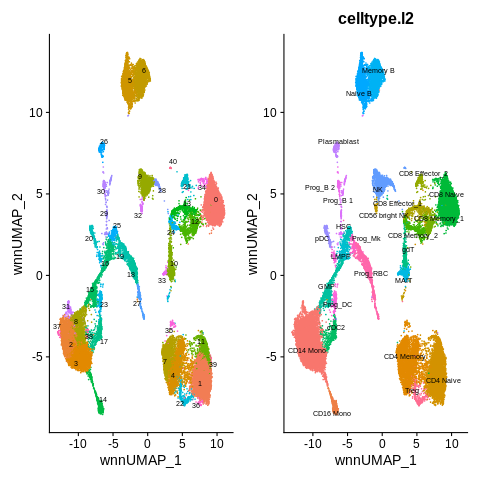

In [10]:
%%R
p1 <- DimPlot(bm, reduction = 'wnn.umap', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()
p2 <- DimPlot(bm, reduction = 'wnn.umap', group.by = 'celltype.l2', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()
p1+p2

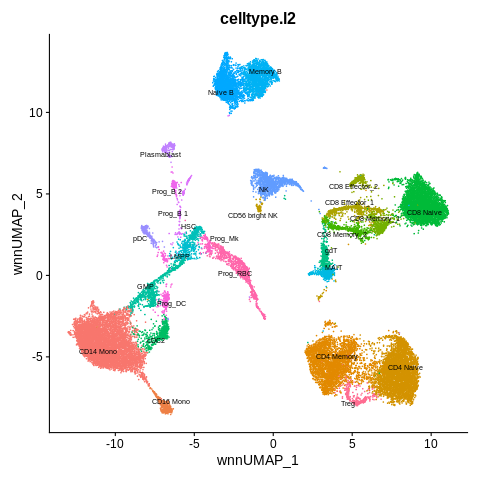

In [11]:
%%R
p2

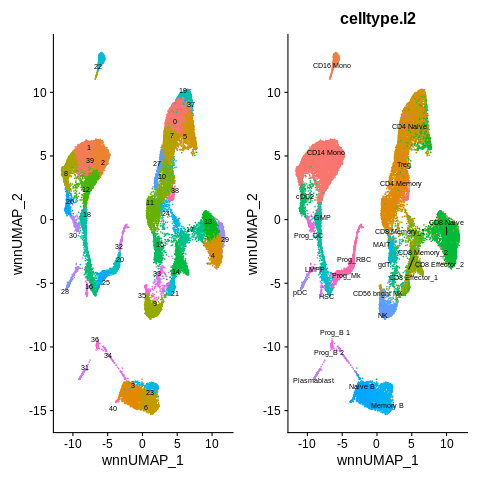

In [12]:
%%R
p1 <- DimPlot(bm_pred, reduction = 'wnn.umap', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()
p2 <- DimPlot(bm_pred, reduction = 'wnn.umap', group.by = 'celltype.l2', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()
p1 + p2

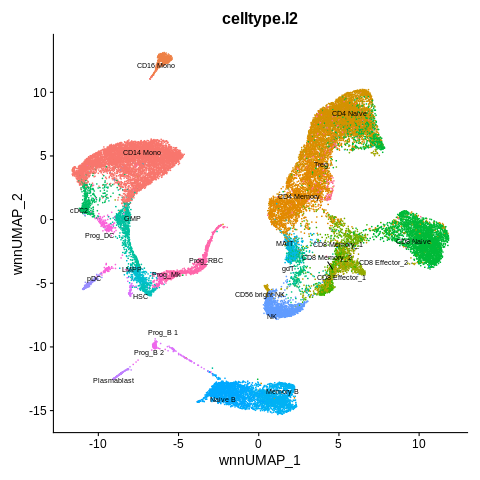

In [13]:
%%R
p2

In [14]:
%%R
bm <- RunUMAP(bm, reduction = 'rpca', dims = 1:30, assay = 'RNA', 
              reduction.name = 'rna.umap', reduction.key = 'rnaUMAP_')
bm <- RunUMAP(bm, reduction = 'apca', dims = 1:18, assay = 'ADT', 
              reduction.name = 'adt.umap', reduction.key = 'adtUMAP_')

bm_pred <- RunUMAP(bm_pred, reduction = 'rpca', dims = 1:30, assay = 'RNA', 
              reduction.name = 'rna.umap', reduction.key = 'rnaUMAP_')
bm_pred <- RunUMAP(bm_pred, reduction = 'papca', dims = 1:18, assay = 'ADT', 
              reduction.name = 'adt.umap', reduction.key = 'adtUMAP_')

R[write to console]: 11:51:32 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 11:51:32 Read 30672 rows and found 30 numeric columns

R[write to console]: 11:51:32 Using Annoy for neighbor search, n_neighbors = 30

R[write to console]: 11:51:32 Building Annoy index with metric = cosine, n_trees = 50

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: 

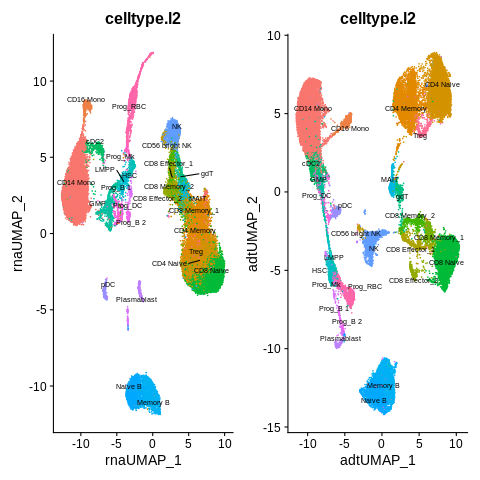

In [15]:
%%R
p3 <- DimPlot(bm, reduction = 'rna.umap', group.by = 'celltype.l2', label = TRUE, 
              repel = TRUE, label.size = 2.5) + NoLegend()
p4 <- DimPlot(bm, reduction = 'adt.umap', group.by = 'celltype.l2', label = TRUE, 
              repel = TRUE, label.size = 2.5) + NoLegend()
p3 + p4

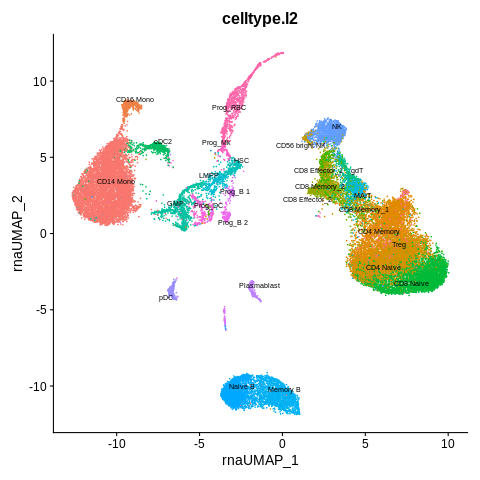

In [27]:
%%R
p3

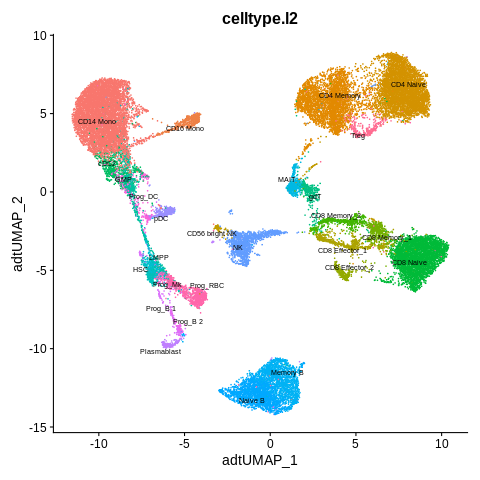

In [17]:
%%R
p4

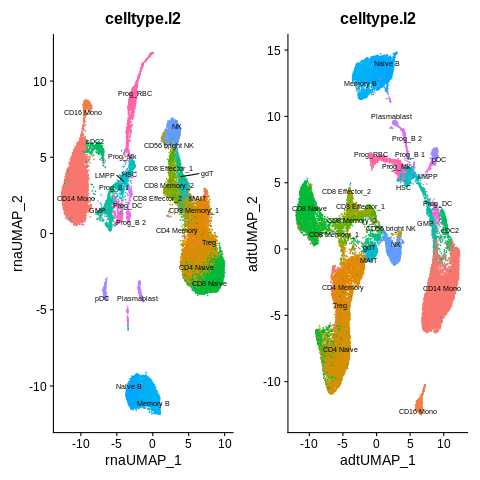

In [18]:
%%R
p3 <- DimPlot(bm_pred, reduction = 'rna.umap', group.by = 'celltype.l2', label = TRUE, 
              repel = TRUE, label.size = 2.5) + NoLegend()
p4 <- DimPlot(bm_pred, reduction = 'adt.umap', group.by = 'celltype.l2', label = TRUE, 
              repel = TRUE, label.size = 2.5) + NoLegend()
p3 + p4

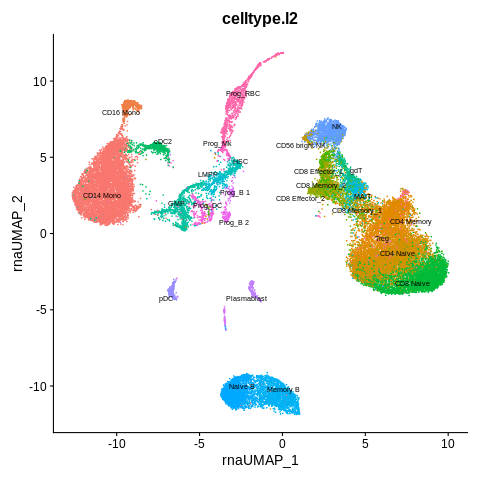

In [19]:
%%R
p3

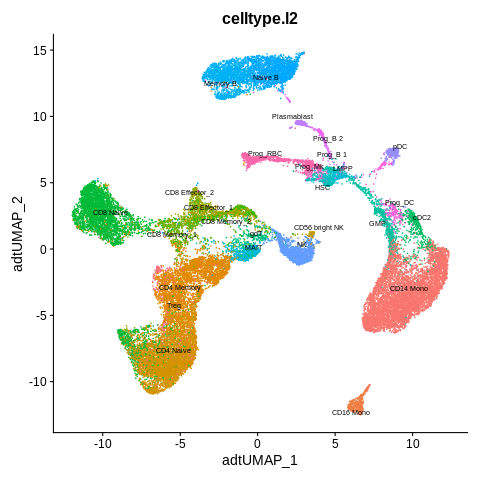

In [20]:
%%R
p4

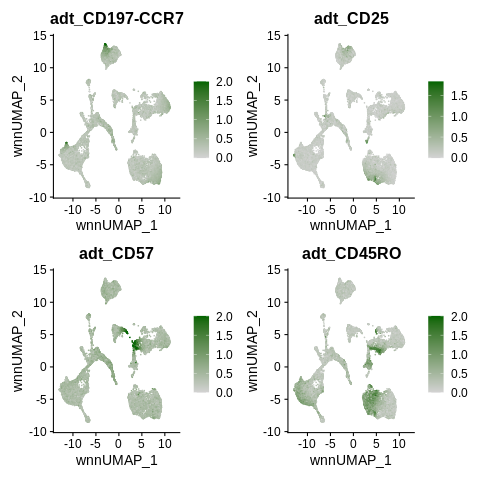

In [21]:
%%R
p5 <- FeaturePlot(bm, features = c("adt_CD197-CCR7", "adt_CD25", "adt_CD57", "adt_CD45RO"),
                  reduction = 'wnn.umap', max.cutoff = 2, 
                  cols = c("lightgrey","darkgreen"), ncol = 2)
p6 <- FeaturePlot(bm, features = c("rna_TRDC","rna_MPO","rna_AVP"), 
                  reduction = 'wnn.umap', max.cutoff = 3, ncol = 3)
p5 #/ p6

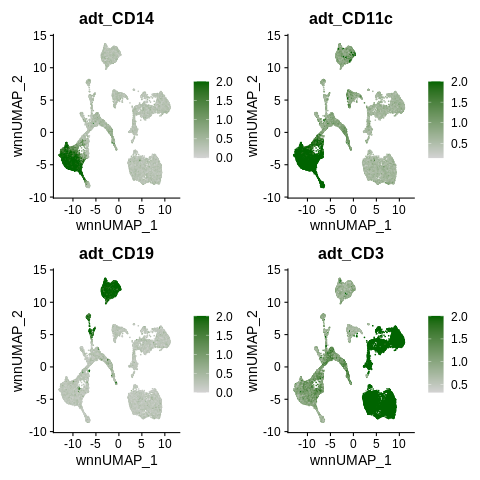

In [25]:
%%R
p5 <- FeaturePlot(bm, features = c("adt_CD14", "adt_CD11c", "adt_CD19" ,"adt_CD3"),
                  reduction = 'wnn.umap', max.cutoff = 2, 
                  cols = c("lightgrey","darkgreen"), ncol = 2)
p5

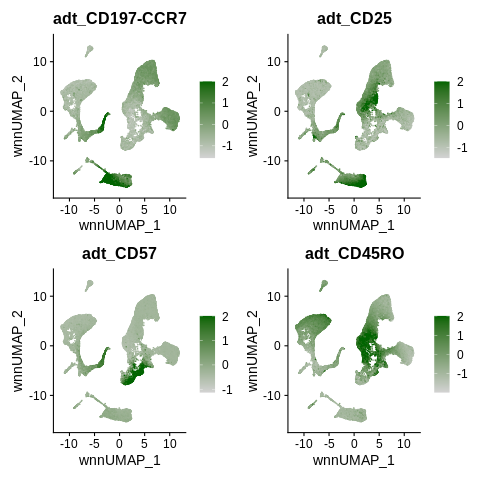

In [23]:
%%R
p5 <- FeaturePlot(bm_pred, features = c("adt_CD197-CCR7", "adt_CD25", "adt_CD57", "adt_CD45RO"),
                  reduction = 'wnn.umap', max.cutoff = 2, 
                  cols = c("lightgrey","darkgreen"), ncol = 2)
p6 <- FeaturePlot(bm_pred, features = c("rna_TRDC","rna_MPO","rna_AVP"), 
                  reduction = 'wnn.umap', max.cutoff = 3, ncol = 3)
p5 #/ p6

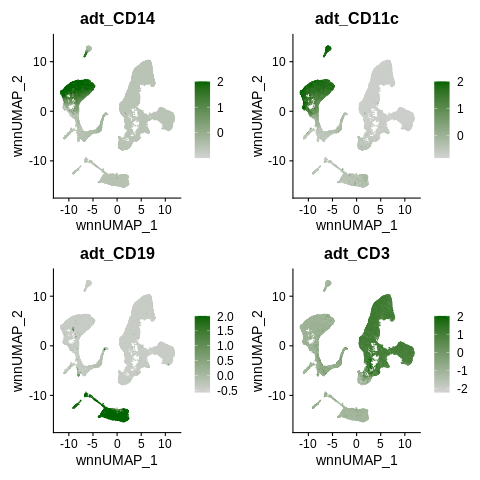

In [26]:
%%R
p5 <- FeaturePlot(bm_pred, features = c("adt_CD14", "adt_CD11c", "adt_CD19" ,"adt_CD3"),
                  reduction = 'wnn.umap', max.cutoff = 2, 
                  cols = c("lightgrey","darkgreen"), ncol = 2)
p5

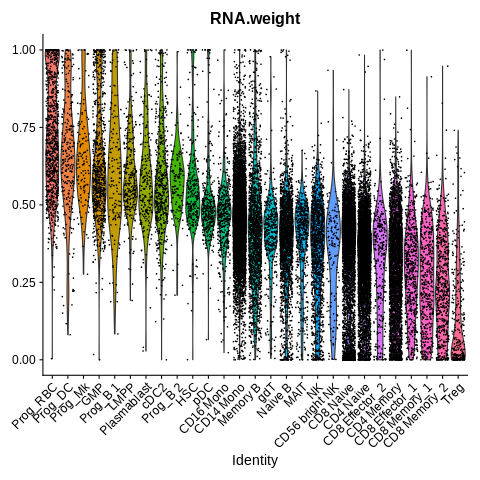

In [ ]:
 %%R
 VlnPlot(bm, features = "RNA.weight", group.by = 'celltype.l2', sort = TRUE, pt.size = 0.1) +
  NoLegend()

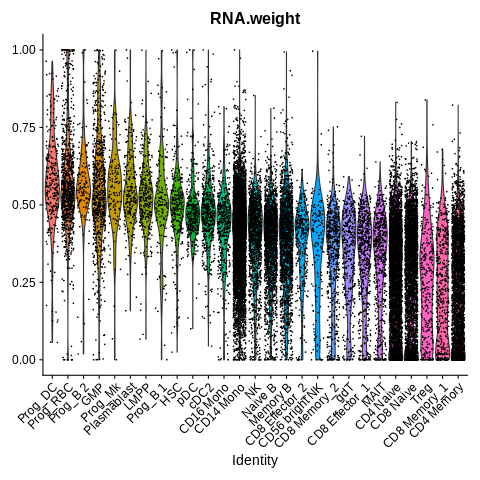

In [ ]:
 %%R
 VlnPlot(bm_pred, features = "RNA.weight", group.by = 'celltype.l2', sort = TRUE, pt.size = 0.1) +
  NoLegend()